Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Druga laboratorijska vježba: Linearni diskriminativni modeli i logistička regresija

*Verzija: 1.1 (ispravljena greška u tekstu prvog zadatka)  
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić  

Rok za predaju: **6. studenog 2022. u 23:59h**

------------------------------

### Upute

Druga laboratorijska vježba sastoji se od šest zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [494]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [495]:
def plot_2d_clf_problem(X, y, h=None):
    """
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given,
    the decision surfaces.
    """
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h:
        # Create a mesh to plot in
        r = 0.04  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r), np.arange(y_min, y_max, r))
        XX = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h, XX)))
            else:
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h, XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20b, marker="o", s=50)

### 1. Linearna regresija kao klasifikator

U prethodnoj laboratorijskoj vježbi koristili smo model linearne regresije za, naravno, regresiju. Međutim, model linearne regresije može se koristiti i za **klasifikaciju**. Iako zvuči pomalo kontraintuitivno, zapravo je dosta jednostavno. Naime, cilj je naučiti funkciju $f(\mathbf{x})$ koja za pozitivne primjere predviđa vrijednost $1$, dok za negativne primjere predviđa vrijednost $0$. U tom slučaju, funkcija $f(\mathbf{x})=0.5$ predstavlja granicu između klasa, tj. primjeri za koje vrijedi $h(\mathbf{x})\geq 0.5$ klasificiraju se kao pozitivni, dok se ostali klasificiraju kao negativni.

Klasifikacija pomoću linearne regresije implementirana je u razredu [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html). U sljedećim podzadatcima **istrenirajte** taj model na danim podatcima i **prikažite** dobivenu granicu između klasa. Pritom isključite regularizaciju ($\alpha = 0$, odnosno `alpha=0`). Također i ispišite **točnost** vašeg klasifikacijskog modela (smijete koristiti funkciju [`metrics.accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)). Skupove podataka vizualizirajte korištenjem pomoćne funkcije ``plot_clf_problem(X, y, h=None)`` koja je dana na početku ove bilježnice. `X` i `y` predstavljaju ulazne primjere i oznake, dok `h` predstavlja funkciju predikcije modela (npr. `model.predict`). 

U ovom zadatku cilj je razmotriti kako se klasifikacijski model linearne regresije ponaša na linearno odvojim i neodvojivim podatcima.

In [496]:
from sklearn.linear_model import LinearRegression, RidgeClassifier
from sklearn.metrics import accuracy_score

### (a)

Prvo, isprobajte *ugrađeni* model na linearno odvojivom skupu podataka `seven` ($N=7$).

In [497]:
seven_X = np.array([[2, 1], [2, 3], [1, 2], [3, 2], [5, 2], [5, 4], [6, 3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Accuracy Score: 100.00%


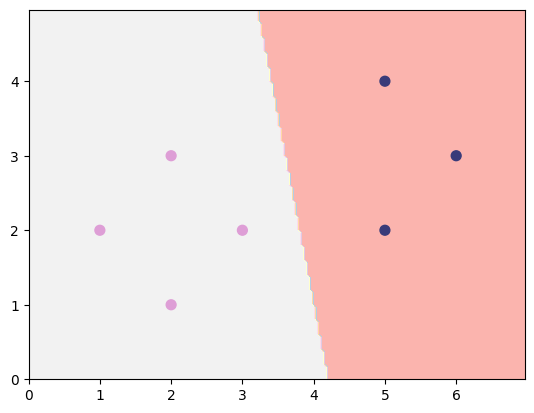

In [498]:
clf = RidgeClassifier(alpha=0)
clf.fit(seven_X, seven_y)
seven_y_predicted = clf.predict(seven_X)

score = accuracy_score(seven_y, seven_y_predicted)

print(f"Accuracy Score: {score * 100:.2f}%")
plot_2d_clf_problem(seven_X, seven_y, clf.predict)
plt.show()

Kako bi se uvjerili da se u isprobanoj implementaciji ne radi o ničemu doli o običnoj linearnoj regresiji, napišite kôd koji dolazi do jednakog rješenja korištenjem isključivo razreda [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). Funkciju za predikciju, koju predajete kao treći argument `h` funkciji `plot_2d_clf_problem`, možete definirati lambda-izrazom: `lambda x : model.predict(x) >= 0.5`.

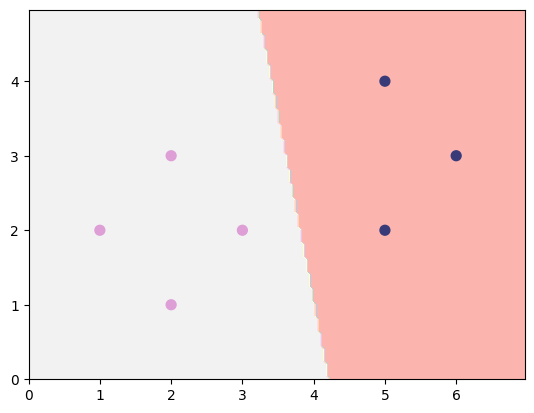

In [499]:
reg = LinearRegression()
reg.fit(seven_X, seven_y)

plot_2d_clf_problem(seven_X, seven_y, lambda x: reg.predict(x) >= 0.5)
plt.show()

**Q:** Kako bi bila definirana granica između klasa ako bismo koristili oznake klasa $-1$ i $1$ umjesto $0$ i $1$?

### (b)  

Probajte isto na linearno odvojivom skupu podataka `outlier` ($N=8$):

In [500]:
outlier_X = np.append(seven_X, [[12, 8]], axis=0)
outlier_y = np.append(seven_y, 0)

Accuracy Score: 87.50%


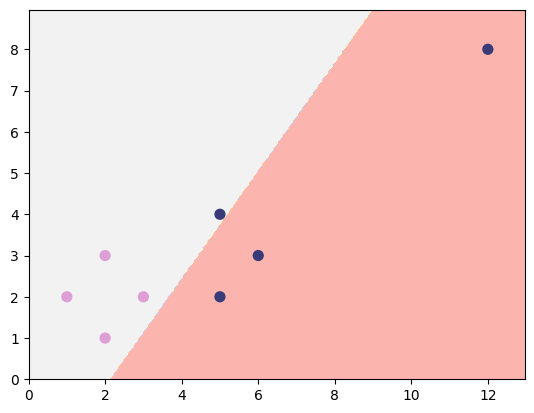

In [501]:
clf.fit(outlier_X, outlier_y)
outlier_y_predicted = clf.predict(outlier_X)

score = accuracy_score(outlier_y, outlier_y_predicted)

print(f"Accuracy Score: {score * 100:.2f}%")
plot_2d_clf_problem(outlier_X, outlier_y, clf.predict)
plt.show()

**Q:** Zašto model ne ostvaruje potpunu točnost iako su podatci linearno odvojivi?

### (c)  

Završno, probajte isto na linearno neodvojivom skupu podataka `unsep` ($N=8$):

In [502]:
unsep_X = np.append(seven_X, [[2, 2]], axis=0)
unsep_y = np.append(seven_y, 0)

Accuracy Score: 87.50%


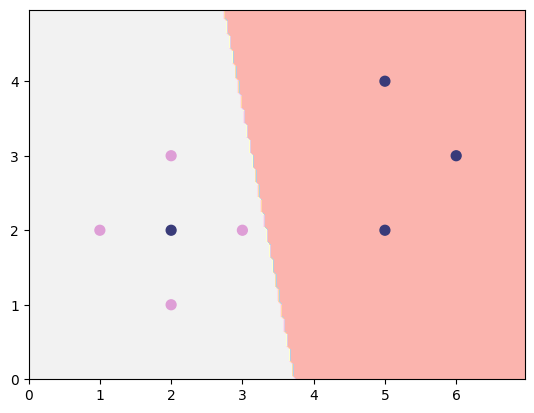

In [503]:
clf.fit(unsep_X, unsep_y)
unsep_y_predicted = clf.predict(unsep_X)

score = accuracy_score(unsep_y, unsep_y_predicted)

print(f"Accuracy Score: {score * 100:.2f}%")
plot_2d_clf_problem(unsep_X, unsep_y, clf.predict)
plt.show()

**Q:** Očito je zašto model nije u mogućnosti postići potpunu točnost na ovom skupu podataka. Međutim, smatrate li da je problem u modelu ili u podacima? Argumentirajte svoj stav.

### 2. Višeklasna klasifikacija

Postoji više načina kako se binarni klasifikatori mogu se upotrijebiti za višeklasnu klasifikaciju. Najčešće se koristi shema tzv. **jedan-naspram-ostali** (engl. *one-vs-rest*, OVR), u kojoj se trenira po jedan klasifikator $h_j$ za svaku od $K$ klasa. Svaki klasifikator $h_j$ trenira se da razdvaja primjere klase $j$ od primjera svih drugih klasa, a primjer se klasificira u klasu $j$ za koju je $h_j(\mathbf{x})$ maksimalan.

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte slučajan dvodimenzijski skup podataka od tri klase i prikažite ga koristeći funkciju `plot_2d_clf_problem`. Radi jednostavnosti, pretpostavite da nema redundantnih značajki te da je svaka od klasa "zbijena" upravo u jednu grupu.

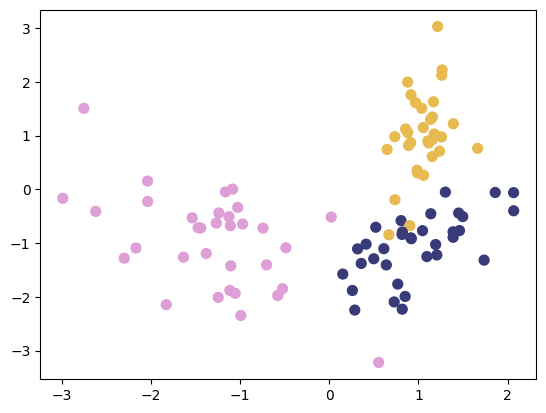

In [504]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=2, n_informative=2, n_redundant=0, n_classes=3, n_clusters_per_class=1
)
plot_2d_clf_problem(X, y)
plt.show()

Trenirajte tri binarna klasifikatora, $h_1$, $h_2$ i $h_3$ te prikažite granice između klasa (tri grafikona). Zatim definirajte $h(\mathbf{x})=\mathrm{argmax}_j h_j(\mathbf{x})$  (napišite svoju funkciju `predict` koja to radi) i prikažite granice između klasa za taj model. Zatim se uvjerite da biste identičan rezultat dobili izravno primjenom modela `RidgeClassifier`, budući da taj model za višeklasan problem zapravo interno implementira shemu jedan-naspram-ostali.

**Q:** Alternativna shema jest ona zvana **jedan-naspram-jedan** (engl, *one-vs-one*, OVO). Koja je prednost sheme OVR nad shemom OVO? A obratno?

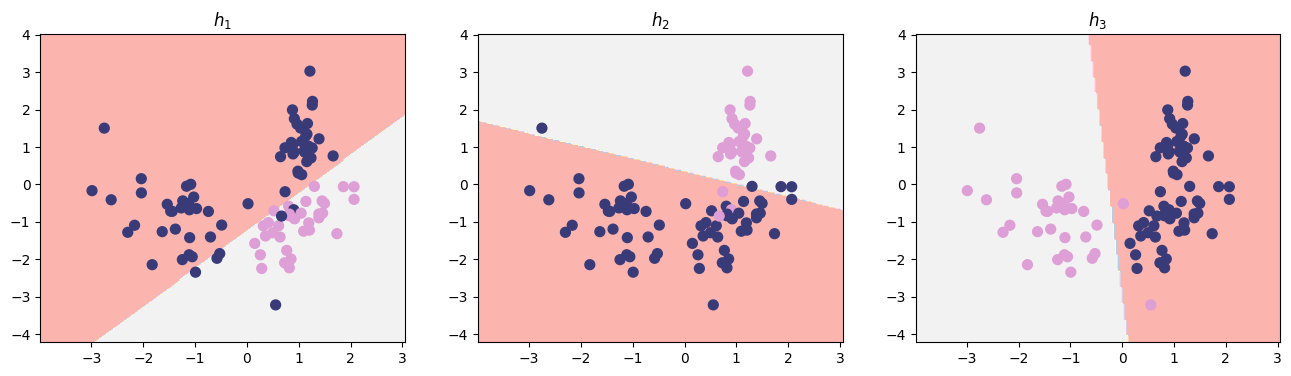

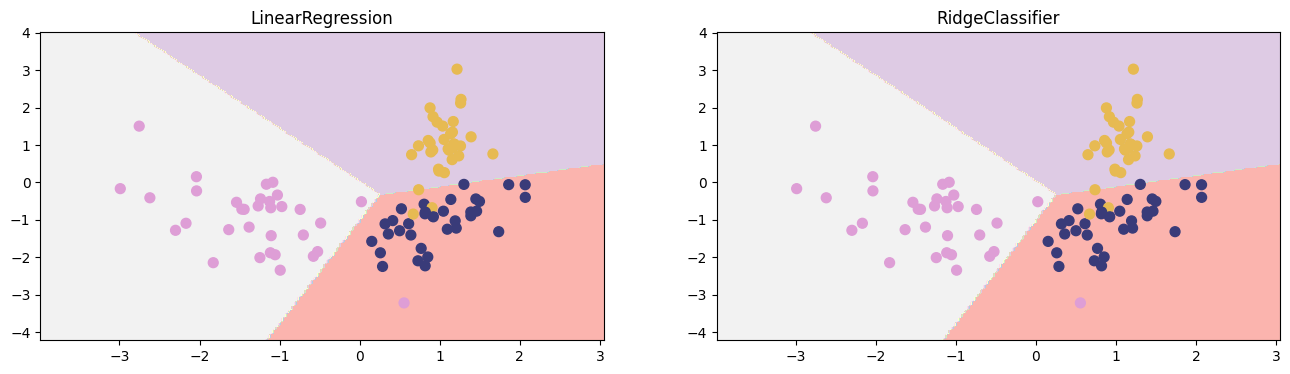

In [505]:
y1, y2, y3 = [], [], []

for value in y:
    if value == 0:
        y1.append(1), y2.append(0), y3.append(0)
    elif value == 1:
        y1.append(0), y2.append(1), y3.append(0)
    elif value == 2:
        y1.append(0), y2.append(0), y3.append(1)

reg1 = LinearRegression()
reg1.fit(X, y1)
h1 = lambda x: reg1.predict(x) >= 0.5

reg2 = LinearRegression()
reg2.fit(X, y2)
h2 = lambda x: reg2.predict(x) >= 0.5

reg3 = LinearRegression()
reg3.fit(X, y3)
h3 = lambda x: reg3.predict(x) >= 0.5

plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plot_2d_clf_problem(X, y1, h1)
plt.title(r"$h_1$")

plt.subplot(1, 3, 2)
plot_2d_clf_problem(X, y2, h2)
plt.title(r"$h_2$")

plt.subplot(1, 3, 3)
plot_2d_clf_problem(X, y3, h3)
plt.title(r"$h_3$")

h = lambda x: np.argmax([reg1.predict([x]), reg2.predict([x]), reg3.predict([x])])
clf = RidgeClassifier(alpha=0)
clf.fit(X, y)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plot_2d_clf_problem(X, y, h)
plt.title("LinearRegression")

plt.subplot(1, 2, 2)
plot_2d_clf_problem(X, y, clf.predict)
plt.title("RidgeClassifier")

plt.show()

### 3. Logistička regresija

Ovaj zadatak bavi se probabilističkim diskriminativnim modelom, **logističkom regresijom**, koja je, unatoč nazivu, klasifikacijski model.

Logistička regresija tipičan je predstavnik tzv. **poopćenih linearnih modela** koji su oblika: $h(\mathbf{x})=f(\mathbf{w}^\intercal\tilde{\mathbf{x}})$. Logistička funkcija za funkciju $f$ koristi tzv. **logističku** (sigmoidalnu) funkciju $\sigma (x) = \frac{1}{1 + \textit{exp}(-x)}$.

### (a)  

Definirajte logističku (sigmoidalnu) funkciju $\mathrm{sigm}(x)=\frac{1}{1+\exp(-\alpha x)}$ i prikažite je za $\alpha\in\{1,2,4\}$.

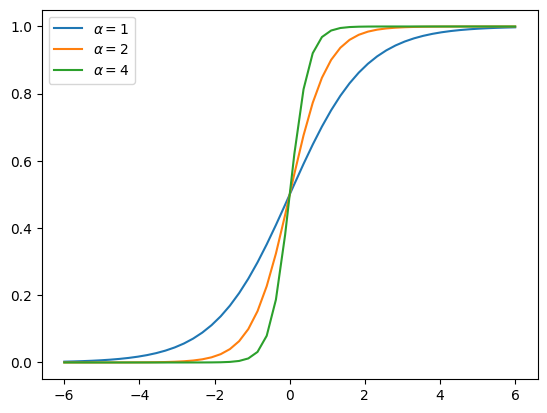

In [506]:
def sigm(x):
    return 1 / (1 + np.exp(-x))


def sigm_with_alpha(x, alpha):
    return 1 / (1 + np.exp(-alpha * x))


X = np.linspace(-6, 6)
alphas = [1, 2, 4]

for alpha in alphas:
    plt.plot(X, sigm_with_alpha(X, alpha), label=fr"$\alpha={alpha}$")

plt.legend()
plt.show()

**Q**: Zašto je sigmoidalna funkcija prikladan izbor za aktivacijsku funkciju poopćenoga linearnog modela? 
</br>

**Q**: Kakav utjecaj ima faktor $\alpha$ na oblik sigmoide? Što to znači za model logističke regresije (tj. kako izlaz modela ovisi o normi vektora težina $\mathbf{w}$)?

### (b) 

Implementirajte funkciju 

> `lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False)` 

za treniranje modela logističke regresije gradijentnim spustom (*batch* izvedba). Funkcija uzima označeni skup primjera za učenje (matrica primjera `X` i vektor oznaka `y`) te vraća $(n+1)$-dimenzijski vektor težina tipa `ndarray`. Ako je `trace=True`, funkcija dodatno vraća listu (ili matricu) vektora težina $\mathbf{w}^0,\mathbf{w}^1,\dots,\mathbf{w}^k$ generiranih kroz sve iteracije optimizacije, od 0 do $k$. Optimizaciju treba provoditi dok se ne dosegne `max_iter` iteracija, ili kada razlika u pogrešci unakrsne entropije između dviju iteracija padne ispod vrijednosti `epsilon`. Parametar `alpha` predstavlja faktor L2-regularizacije.

Preporučamo definiranje pomoćne funkcije `lr_h(x,w)` koja daje predikciju za primjer `x` uz zadane težine `w`. Također, preporučamo i funkciju `cross_entropy_error(X,y,w)` koja izračunava pogrešku unakrsne entropije modela na označenom skupu `(X,y)` uz te iste težine.

**NB:** Obratite pozornost na to da je način kako su definirane oznake ($\{+1,-1\}$ ili $\{1,0\}$) kompatibilan s izračunom funkcije gubitka u optimizacijskome algoritmu.

In [507]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import PolynomialFeatures


def lr_h(x, w):
    Phi = PolynomialFeatures(degree=1).fit_transform(x.reshape(1, -1))
    return sigm(np.dot(Phi, w))


def cross_entropy_error(X, y, w):
    Phi = PolynomialFeatures(degree=1).fit_transform(X)

    return log_loss(y, sigm(np.dot(Phi, w)))


def lr_train(X, y, eta=0.01, max_iter=2000, alpha=0, epsilon=0.0001, trace=False):
    example_count, feature_count = np.shape(X)
    w_tilda = np.zeros(feature_count + 1)
    w_trace = []

    err = cross_entropy_error(X, y, w_tilda)

    for _ in range(max_iter):
        delta_w_0 = 0
        delta_w = np.zeros(feature_count)

        for i in range(example_count):
            h = lr_h(X[i], w_tilda)
            delta_w_0 -= h - y[i]
            delta_w -= (h - y[i]) * X[i]

        w_tilda[0] += eta * delta_w_0
        w_tilda[1:] = w_tilda[1:] * (1 - eta * alpha) + eta * delta_w

        w_trace.append(w_tilda.copy())

        new_err = cross_entropy_error(X, y, w_tilda)
        if np.abs(err - new_err) < epsilon:
            break

        err = new_err

    if trace:
        return w_tilda, w_trace

    return w_tilda

### (c)

Koristeći funkciju `lr_train`, trenirajte model logističke regresije na skupu `seven`, prikažite dobivenu granicu između klasa te  izračunajte pogrešku unakrsne entropije. 

**NB:** Pripazite da modelu date dovoljan broj iteracija.

In [508]:
seven_X = np.array([[2, 1], [2, 3], [1, 2], [3, 2], [5, 2], [5, 4], [6, 3]])
seven_y = np.array([1, 1, 1, 1, 0, 0, 0])

Weights=[ 4.45449454 -1.71089242  0.68413507]
Cross Entropy Error=0.13521872720206746


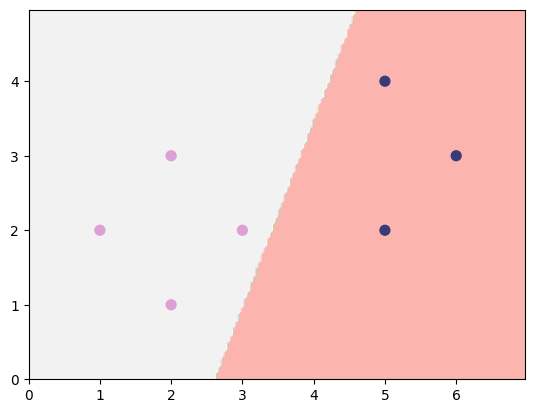

In [509]:
w = lr_train(seven_X, seven_y)
error = cross_entropy_error(seven_X, seven_y, w)
print(f"Weights={w}")
print(f"Cross Entropy Error={error}")

plot_2d_clf_problem(seven_X, seven_y, lambda x: lr_h(x, w) >= 0.5)
plt.show()

**Q:** Koji kriterij zaustavljanja je aktiviran?

**Q:** Zašto dobivena pogreška unakrsne entropije nije jednaka nuli?

**Q:** Kako biste utvrdili da je optimizacijski postupak doista pronašao hipotezu koja minimizira pogrešku učenja? O čemu to ovisi?

**Q:** Na koji način biste preinačili kôd ako biste htjeli da se optimizacija izvodi stohastičkim gradijentnim spustom (*online learning*)?

### (d)

Prikažite na jednom grafikonu pogrešku unakrsne entropije (očekivanje logističkog gubitka) i pogrešku klasifikacije (očekivanje gubitka 0-1) na skupu `seven` kroz iteracije optimizacijskog postupka. Koristite trag težina funkcije `lr_train` iz zadatka (b) (opcija `trace=True`). Na drugom grafikonu prikažite pogrešku unakrsne entropije kao funkciju broja iteracija za različite stope učenja, $\eta\in\{0.005,0.01,0.05,0.1\}$.

In [510]:
from sklearn.metrics import zero_one_loss

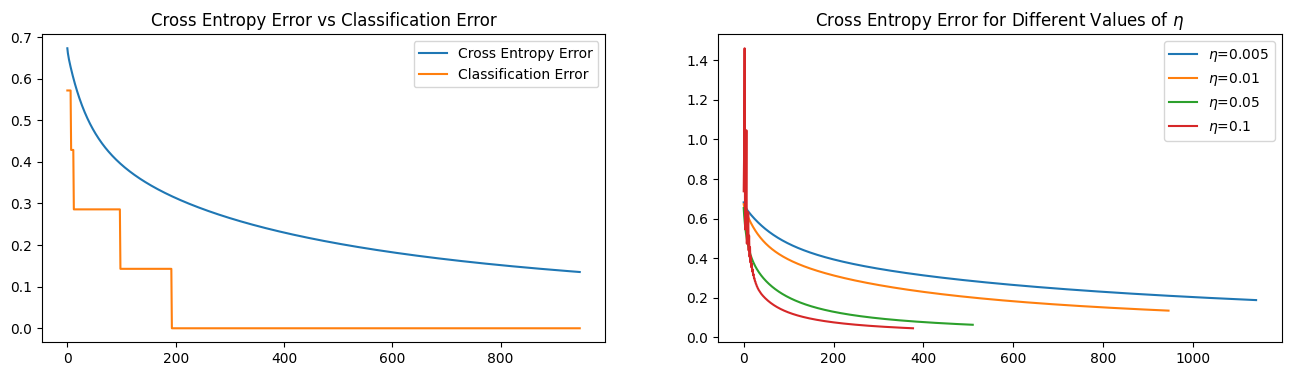

In [511]:
w, w_trace = lr_train(seven_X, seven_y, trace=True)

errors_cross_entropy = []
errors_zero_one = []

Phi = PolynomialFeatures(degree=1).fit_transform(seven_X)

for k in w_trace:
    errors_cross_entropy.append(cross_entropy_error(seven_X, seven_y, k))
    errors_zero_one.append(
        zero_one_loss(seven_y, (lambda x: x >= 0.5)(sigm(np.dot(Phi, k))))
    )

etas = [0.005, 0.01, 0.05, 0.1]
etas_errors = dict.fromkeys(etas)
for eta in etas:
    errors = []
    w, w_trace = lr_train(seven_X, seven_y, trace=True, eta=eta)

    for k in w_trace:
        errors.append(cross_entropy_error(seven_X, seven_y, k))

    etas_errors[eta] = errors

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(errors_cross_entropy, label="Cross Entropy Error")
plt.plot(errors_zero_one, label="Classification Error")
plt.title("Cross Entropy Error vs Classification Error")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(etas_errors[etas[0]], label=r"$\eta$=0.005")
plt.plot(etas_errors[etas[1]], label=r"$\eta$=0.01")
plt.plot(etas_errors[etas[2]], label=r"$\eta$=0.05")
plt.plot(etas_errors[etas[3]], label=r"$\eta$=0.1")
plt.title(r"Cross Entropy Error for Different Values of $\eta$")
plt.legend()
plt.show()


**Q:** Zašto je pogreška unakrsne entropije veća od pogreške klasifikacije? Je li to uvijek slučaj kod logističke regresije i zašto?

**Q:** Koju stopu učenja $\eta$ biste odabrali i zašto?

### (e)

Upoznajte se s klasom [`linear_model.LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) koja implementira logističku regresiju. Usporedite rezultat modela na skupu `seven` s rezultatom koji dobivate pomoću vlastite implementacije algoritma.

**NB:** Kako ugrađena implementacija koristi naprednije verzije optimizacije funkcije, vrlo je vjerojatno da Vam se rješenja neće poklapati, ali generalne performanse modela bi trebale. Ponovno, pripazite na broj iteracija i snagu regularizacije.

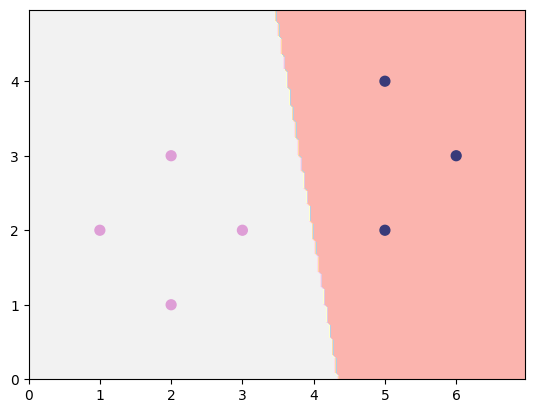

In [512]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=2000, C=100).fit(seven_X, seven_y)
plot_2d_clf_problem(seven_X, seven_y, reg.predict)
plt.show()

### 4. Analiza logističke regresije

### (a)

Koristeći ugrađenu implementaciju logističke regresije, provjerite kako se logistička regresija nosi s vrijednostima koje odskaču. Iskoristite skup `outlier`. Prikažite granicu između klasa.

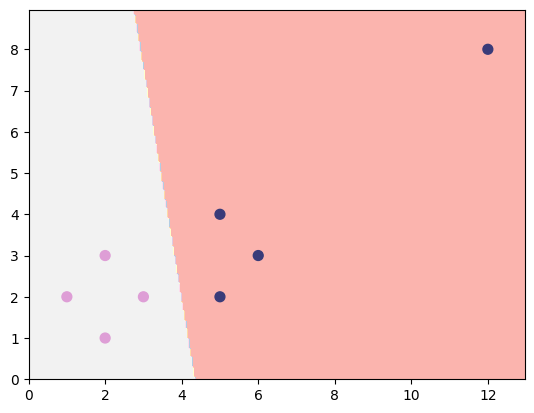

In [513]:
outlier_X = np.append(seven_X, [[12, 8]], axis=0)
outlier_y = np.append(seven_y, 0)

reg = LogisticRegression(max_iter=2000, C=100).fit(outlier_X, outlier_y)
plot_2d_clf_problem(outlier_X, outlier_y, reg.predict)
plt.show()

**Q:** Zašto se rezultat razlikuje od onog koji je dobio model klasifikacije linearnom regresijom iz prvog zadatka?

### (b)

Trenirajte model logističke regresije na skupu `seven` te na dva odvojena grafikona prikažite, kroz iteracije optimizacijskoga algoritma, (1) izlaz modela $h(\mathbf{x})$ za svih sedam primjera te (2) vrijednosti težina $w_0$, $w_1$, $w_2$.

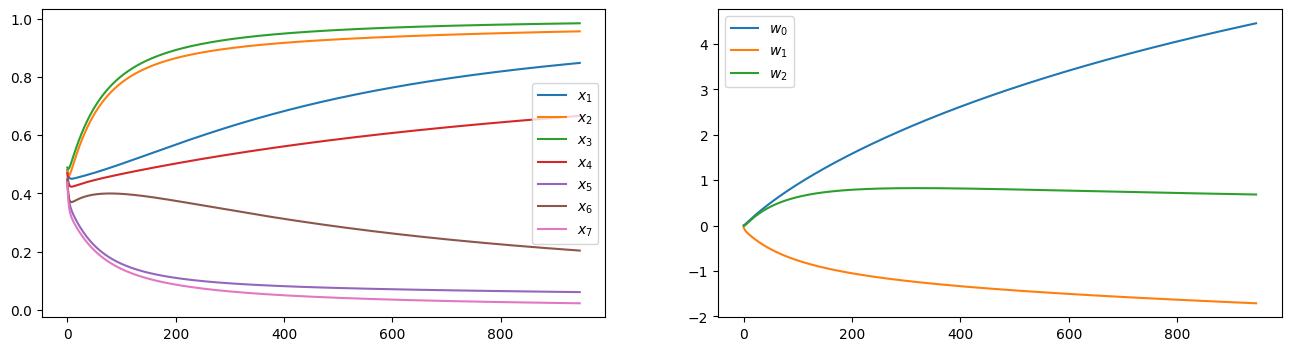

In [514]:
_, w_trace = lr_train(seven_X, seven_y, trace=True)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for i, x in enumerate(seven_X, start=1):
    h = []
    for w in w_trace:
        h.append(lr_h(x, w))

    plt.plot(h, label=fr"$x_{i}$")

plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    w_i = []
    for w in w_trace:
        w_i.append(w[i])

    plt.plot(w_i, label=fr"$w_{i}$")

plt.legend()
plt.show()

### (c)

Ponovite eksperiment iz podzadatka (b) koristeći linearno neodvojiv skup podataka `unsep`.

In [515]:
unsep_X = np.append(seven_X, [[2, 2]], axis=0)
unsep_y = np.append(seven_y, 0)

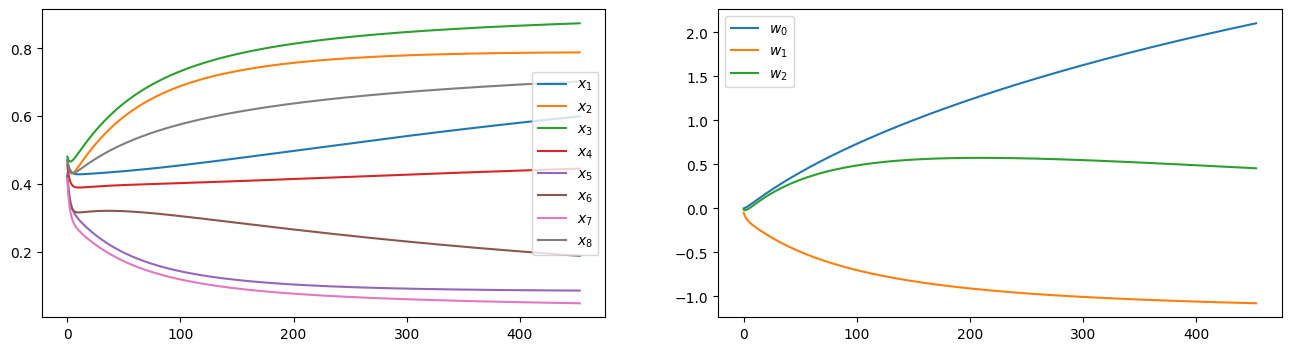

In [516]:
_, w_trace = lr_train(unsep_X, unsep_y, trace=True)

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for i, x in enumerate(unsep_X, start=1):
    h = []
    for w in w_trace:
        h.append(lr_h(x, w))

    plt.plot(h, label=fr"$x_{i}$")

plt.legend()

plt.subplot(1, 2, 2)
for i in range(3):
    w_i = []
    for w in w_trace:
        w_i.append(w[i])
    
    plt.plot(w_i, label=fr"$w_{i}$")

plt.legend()
plt.show()

**Q:** Usporedite grafikone za slučaj linearno odvojivih i linearno neodvojivih primjera te komentirajte razliku.

### 5. Regularizirana logistička regresija

Trenirajte model logističke regresije na skupu `seven` s različitim faktorima L2-regularizacije, $\alpha\in\{0,1,10,100\}$. Prikažite na dva odvojena grafikona (1) pogrešku unakrsne entropije te (2) L2-normu vektora $\mathbf{w}$ kroz iteracije optimizacijskog algoritma.

In [517]:
from numpy.linalg import norm

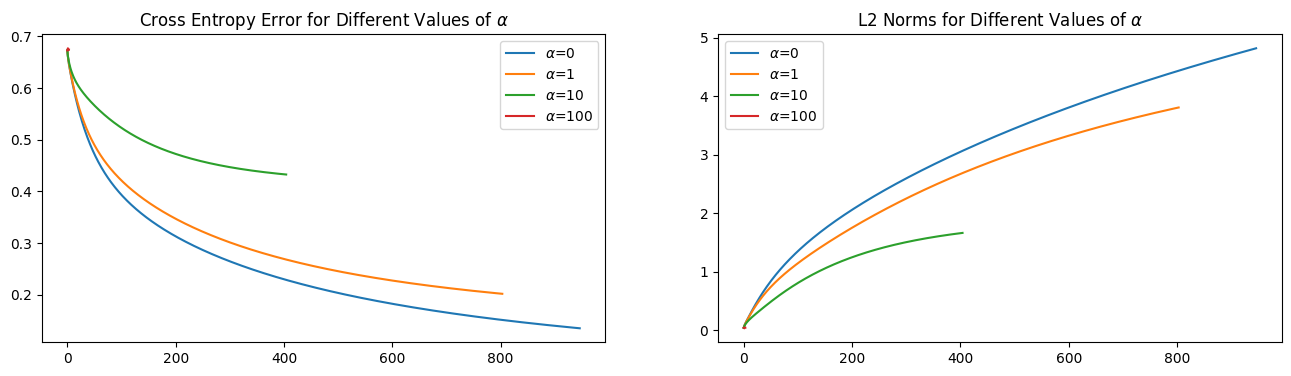

In [518]:
alphas = [0, 1, 10, 100]
alphas_with_errors = dict.fromkeys(alphas)
alphas_with_norms = dict.fromkeys(alphas)

for alpha in alphas:
    _, w_trace = lr_train(seven_X, seven_y, alpha=alpha, trace=True)
    errors = []
    L2_norms = []

    for w in w_trace:
        errors.append(cross_entropy_error(seven_X, seven_y, w))
        L2_norms.append(np.linalg.norm(w))

    alphas_with_errors[alpha] = errors
    alphas_with_norms[alpha] = L2_norms

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
for alpha, error in alphas_with_errors.items():
    plt.plot(error, label=fr"$\alpha$={alpha}")
plt.title(r"Cross Entropy Error for Different Values of $\alpha$")
plt.legend()

plt.subplot(1, 2, 2)
for alpha, norm in alphas_with_norms.items():
    plt.plot(norm, label=fr"$\alpha$={alpha}")
plt.title(r"L2 Norms for Different Values of $\alpha$")
plt.legend()

plt.show()

**Q:** Jesu li izgledi krivulja očekivani i zašto?

**Q:** Koju biste vrijednost za $\alpha$ odabrali i zašto?

### 6. Logistička regresija s funkcijom preslikavanja

Proučite funkciju [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html). Generirajte i prikažite dvoklasan skup podataka s ukupno $N=100$ dvodimenzijskih ($n=2)$ primjera, i to sa dvije grupe po klasi (`n_clusters_per_class=2`). Malo je izgledno da će tako generiran skup biti linearno odvojiv, međutim to nije problem jer primjere možemo preslikati u višedimenzijski prostor značajki pomoću klase [`preprocessing.PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), kao što smo to učinili kod linearne regresije u prvoj laboratorijskoj vježbi. Trenirajte model logističke regresije koristeći za preslikavanje u prostor značajki polinomijalnu funkciju stupnja $d=2$ i stupnja $d=3$. Prikažite dobivene granice između klasa. Možete koristiti svoju implementaciju, ali se radi brzine preporuča koristiti `linear_model.LogisticRegression`. Regularizacijski faktor odaberite po želji.

**NB:** Kao i ranije, za prikaz granice između klasa koristite funkciju `plot_2d_clf_problem`. Funkciji kao argumente predajte izvorni skup podataka, a preslikavanje u prostor značajki napravite unutar poziva funkcije `h` koja čini predikciju, na sljedeći način:

In [519]:
from sklearn.preprocessing import PolynomialFeatures

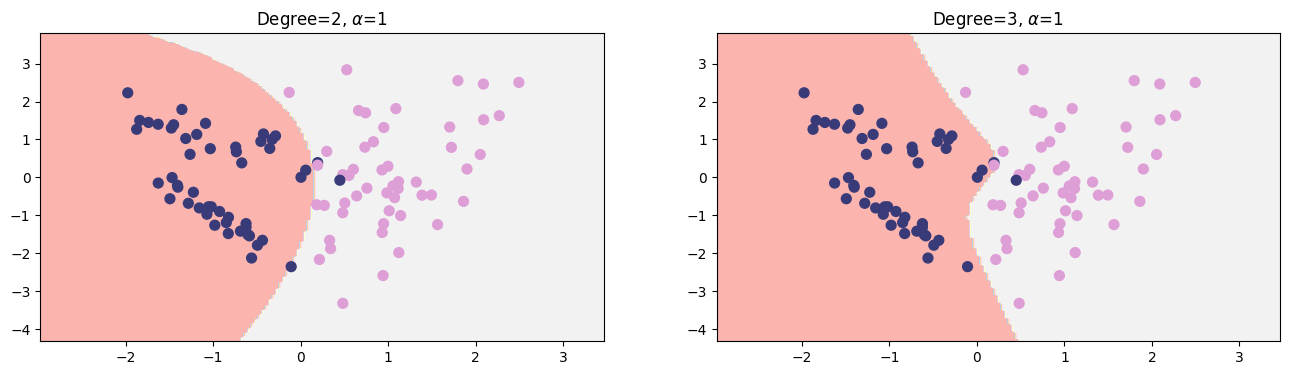

In [520]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=100, n_features=2, n_redundant=0, n_classes=2, n_clusters_per_class=2
)

degrees = [2, 3]
alpha = 1

plt.figure(figsize=(16, 4))

for i, degree in enumerate(degrees, start=1):
    poly = PolynomialFeatures(degree=degree)
    Phi = poly.fit_transform(X)

    reg = LogisticRegression(C=alpha ** -1).fit(Phi, y)

    plt.subplot(1, 2, i)
    plot_2d_clf_problem(X, y, lambda x: reg.predict(poly.transform(x)))
    plt.title(fr"Degree={degree}, $\alpha$={alpha}")

**Q:** Koji biste stupanj polinoma upotrijebili i zašto? Je li taj odabir povezan s odabirom regularizacijskog faktora $\alpha$? Zašto?